Установка и импорт необходимых библиотек

In [ ]:
%%writefile requirements.txt
# Основные зависимости LlamaIndex
llama-index-core==0.10.46
llama-index-llms-huggingface==0.2.3
llama-index-embeddings-huggingface==0.2.2
llama-index-retrievers-bm25==0.1.3
llama-hub==0.0.75

# Hugging Face и трансформеры
transformers==4.42.0
sentence-transformers==2.7.0
tokenizers==0.19.1
safetensors==0.4.3
accelerate==0.31.0
bitsandbytes==0.43.0
peft==0.11.1
huggingface-hub==0.23.3

# Обработка документов
pypdf==4.2.0
pymupdf==1.23.0
langchain==0.2.5
langchain-community==0.2.5
langchain-huggingface==0.0.3

# Дополнительные утилиты
pyvis==0.3.2
ipython==7.34.0
numpy==1.25.2
packaging==24.1
pyyaml==6.0.1
requests==2.31.0
tqdm==4.66.4
filelock==3.14.0
regex==2024.5.15
typing-extensions==4.12.2
sentencepiece==0.1.99

# Torch
torch==2.3.1
torchvision==0.18.1
torchaudio==2.3.1

Writing requirements.txt


In [ ]:
!pip install -r requirements.txt

In [ ]:
# Базовые компоненты Llama Index
from llama_index.core import VectorStoreIndex, Settings
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import SimpleDirectoryReader
from llama_index.core.retrievers import VectorIndexRetriever
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core.response_synthesizers import get_response_synthesizer
# Библиотеки для работы с LLM
from llama_index.llms.huggingface import HuggingFaceLLM
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
# Трансформеры и PyTorch
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_id" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


Скачиваем файл с данными

In [ ]:
!mkdir -p 'data/'
!wget [ссылка на файл в формате .pdf] -O 'data/price.pdf'

Загрузка и настройка моделей

In [ ]:
MODEL_NAME = "yandex/YandexGPT-5-Lite-8B-instruct"

# Инициализация модели и токенизатора
tokenizer_llm = AutoTokenizer.from_pretrained(MODEL_NAME)  # Создание токенизатора
model_llm = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,               # Загрузка модели
    device_map="auto",        # Автоматический выбор устройства для загрузки
    torch_dtype="auto",       # Автоматический выбор типа данных
    load_in_4bit=True         # Загрузка модели в 4-битном формате, для экономии памяти
)

llm = HuggingFaceLLM(         # Создаем модель для генирации текста
    model=model_llm,          # Загружаем модель
    tokenizer=tokenizer_llm,  # Загружаем токенизатор
    max_new_tokens=512,       # Максимальное значение новых токенов в ответе
    generate_kwargs={         # Параметры генирации текста
        "temperature": 0.3,       	# Контроль случайности
        "top_p": 0.1,               # Контроль разнообразия
        "do_sample": True,          # Сэмплирование
    }
)

tokenizer_config.json:   0%|          | 0.00/192k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/2.57M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

In [ ]:
# Настройка параметров для работы с эмбеддингами
EMBED_MODEL_NAME = "sentence-transformers/all-mpnet-base-v2"

Settings.embed_model = HuggingFaceEmbedding(EMBED_MODEL_NAME)  # Инициализация модели

Settings.chunk_size = 512                                      # Установка размера "порций" текста для обработки

Settings.node_parser = SentenceSplitter()                      # Инициализация парсера для разделения текста на смысловые части

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Загрузка и подготовка данных

In [ ]:
documents = SimpleDirectoryReader("./data").load_data()   # Загрузга документа из директории "./data"

/usr/local/lib/python3.11/dist-packages/pypdf/_crypt_providers/_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from this module in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [ ]:
# Создаем поисковую систему
index = VectorStoreIndex.from_documents(documents)    # Создаем индекс эмбеддинга

retriever = VectorIndexRetriever(     # Создаем механизм поиска по индексу
    index=index,                      # Указываем используемый индекс, который ранее создали
    similarity_top_k=3,               # Указываем количество наиболее релевантных результатов для возврата
)

response_synthesizer = get_response_synthesizer(    # Настраимваем синтезатор ответа
    response_mode="compact",                        # Режим компактного ответа
    llm=llm                                         # Указываем используемую языковую модель
    )

query_engine = RetrieverQueryEngine(                # Создаем механизм обработки запросов
    retriever=retriever,                            # Указываем ранее созданный механизм поиска
    response_synthesizer=response_synthesizer       # и синтезатор ответа
)

Зададим вопрос модели для понимания, что она "видит и думает" о полученных данных

In [ ]:
query = "Какими данными ты обладаешь?"    # Формируем вопрос к модели
response = query_engine.query(query)      # Отправляем запрос через поисковую систему
print(response)                           # Выводим полученный ответ

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:391: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn('Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.')



Я обладаю данными о ценах на различные вкусы напитков и продуктов, которые представлены в файлах с метками page_label и соответствующими путями файлов. Например, в одном из файлов указаны цены на такие вкусы как Вишня, Яблочный сок, Черника, Голубика, Бабл Гам и другие. Цены указаны в рублях.


Несмотря на то что в таблице есть информация о том, что представленно в ней, модель приняла это за еду и напитки

Напишим инструкцию

In [ ]:
# Создаем функцию для генерации запроса с инструкцией
def generate_query(user_question):
    system_instruction = """
    Ты работаешь с информацией о кальянных смесях. Важно:
    1. Все упоминания ароматов относятся только к кальянным смесям
    2. Это табачные изделия для курения в кальяне
    3. Не пиши про использование как напитков или еды
    4. Указывай, что речь идет о табачном продукте и в конце КАЖДОГО ответа добавляй предупреждение о вреде курения
    5. Описывай только характеристики смесей для кальяна
    6. Формат данных: сначала указывается производитель, в скобках пишется вес упаковки, далее идут ароматы
    7. Когда предлагаешь аромат всегда подчеркивай его смесью из файла
    8. Указывай вес упаковки, если он запрашивается
    9. В ответах используй слово "ассортимент" вместо "файл" или подобных терминов
    10. Ответ должен быть  ясным, однозначным и кратким
    11. Всегда обосновывай свой ответ
    12. Не придумывай несуществующие ароматы или производителей
    13. Если запрашиваемый вкус отсутствует, предложи альтернативные варианты из имеющихся в таблице
    14. При отсутствии подходящих вариантов честно сообщи об этом
    15. Ты отвечаешь только на вопросы кальянокурения, на все остальные отвечай "Я не знаю"

    Допустимые производители:
    - Afzal
    - Banger
    - Black Burn
    - Burn NEW
    - Darkside
    - OVERDOSE & MIXOLOGIST
    - Brusko
    - Brusko Tobacco
    - Chabacco Emotions
    - Chabacco Medium
    - Chabacco Mix Line
    - XPERIENCE by Darkside
    - Dogma
    - Deus
    - Duft
    - Element Вода
    - Element Воздух
    - Element Земля
    - Endorphine
    - FAKE
    - HOOK by Chabacco
    - HYPREME MIX
    - HYPREME RED
    - HYPREME BLACK
    - ISKRA
    - Jent Alcohol x SARKOZY
    - Jent CIGAR
    - Jent Alcohol
    - Jent Classic
    - Jent Herbal
    - Leteam
    - Must Have
    - NAШ
    - Rave
    - Sapphire Crown
    - Satyr
    - Sebero Arctic Mix
    - Sebero Black
    - Spectrum
    - Spectrum Hard
    - Split
    - Starline
    - Сарма
    - СЕВЕРНЫЙ
    - СЕВЕРНЫЙ PROFESSIONAL
    - Хулиган
    - Хулиган HARD

    Правила выбора смесей для миксов(если тебя попросят подобрать микс, то рукуводствуйся этим правилом):
    1. Выбор базового вкуса:
    - Определи основной компонент, который будет задавать тон всей смеси
    - Выбирай узнаваемый, не перебивающий другие ингредиенты вкус
    - Учитывайте категорию (фруктовые, десертные, цитрусовые)

    2. Добавление дополнительных оттенков:
    - Подбирай 1-2 дополнительных вкуса для подчеркивания базы
    - Избегай перегрузки смеси
    - Учитывайте сочетаемость ароматов

    3. Оценка интенсивности:
    - Определяйте доминирующие и фоновые вкусы
    - Сильные ароматы используйте как акценты
    - Мягкие и средние - как основу

    4. Учет пропорций:
    - Базовый вкус: 60-70% от общей смеси
    - Дополнительный: 30-40%
    - Третий компонент: до 15%

    5. Рекомендации по смешиванию:
    - Используйте табак одного бренда или схожей крепости

    Формат ответа:
    Название вкуса от Производитель
    Описание вкуса
    """

    # Объединяем инструкцию и вопрос пользователя
    full_query = f"{system_instruction}\n\nВопрос: {user_question}"
    return full_query


In [ ]:
user_question = "Какими данными ты обладаешь?"                   # Формируем вопрос к модели
response = query_engine.query(generate_query(user_question))     # Отправляем запрос через поисковую систему
print(response)                                                  # Выводим полученный ответ

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



    Я обладаю информацией об ассортименте кальянных смесей, включая их производителей, ароматы и веса упаковок. Например, в ассортименте есть смеси от производителей Afzal, Banger, Black Burn, Burn NEW, Darkside, OVERDOSE & MIXOLOGIST, Brusko, Chabacco Emotions, Chabacco Medium, Chabacco Mix Line, XPERIENCE by Darkside, Dogma, Deus, Duft, Element, Endorphine, FAKE, HOOK by Chabacco, HYPREME MIX, HYPREME RED, HYPREME BLACK, ISKRA, Jent Alcohol x SARKOZY, Jent CIGAR, Jent Alcohol, Jent Classic, Jent Herbal, Leteam, Must Have, NAШ, Rave, Sapphire Crown, Satyr, Sebero Arctic Mix, Sebero Black, Spectrum, Spectrum Hard, Split, Starline, Сарма, СЕВЕРНЫЙ, СЕВЕРНЫЙ PROFESSIONAL, Хулиган, Хулиган HARD. 
    В ассортименте представлены различные ароматы, включая фруктовые, десертные, цитрусовые и другие. 
    Я не могу предоставить информацию о конкретных пропорциях или рекомендациях по смешиванию, но могу предложить общие принципы для создания миксов. 
    Вред курения — это серьёзная проблема,

Отлично! Модель теперь понимает какие данные ей передаются

Но все же в файле есть не только кальянные смеси, но и много чего другого. Проверим понимает ли она это.

In [ ]:
user_question = "Составь пошаговый гайд по созданию первого микса для новичка"    # Формируем вопрос к модели
response = query_engine.query(generate_query(user_question))                      # Отправляем запрос через поисковую систему
print(response)                                                                   # Выводим полученный ответ

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



1. Выбор базового вкуса: определи основной компонент, который будет задавать тон всей смеси. Например, это может быть "Black Currant (Черная смородина)" от Duft.
2. Добавление дополнительных оттенков: подбери 1-2 дополнительных вкуса для подчеркивания базы. Например, можно добавить "Green Apple (Зеленое Яблоко)" или "Pear (Груша)" от Duft.
3. Оценка интенсивности: доминирующий вкус должен составлять 60-70% от общей смеси, дополнительные – 30-40%.
4. Учёт пропорций: например, можно взять 70% черной смородины и по 15% зеленого яблока и груши.
5. Смешивание: используйте табак одного бренда или схожей крепости.

Предупреждение о вреде курения: курение табака вредно для здоровья и может привести к серьезным заболеваниям.


Green Apple (Зеленое Яблоко) от Duft, это жидкость для POD-СИСТЕМ.

Посмотрим, какие данные передаются в модель

In [ ]:
# Проверим наличие функции generate_query и используется ли она
query = generate_query(user_question) if "generate_query" in globals() else user_question

# Получаем релевантные чанки
retrieved_nodes = retriever.retrieve(query)

# Выводим найденные фрагменты
print("Топ-3 наиболее релевантных чанка")
for i, node in enumerate(retrieved_nodes, 1):
    print(f"Chunk #{i} (Score: {node.score:.3f}):\n{node.text}\n---")

Топ-3 наиболее релевантных чанка
Chunk #1 (Score: 0.458):
Жидкость DUFT (30 мл.) 2%
Black Currant (Черная смородина) 450
Cherry Gum (Вишневая Жвачка) 450
Grape (Виноград) 450
Green Apple (Зеленое Яблоко) 450
Melon (Дыня) 450
Mixed Berries (Ягоды) 450
Mojito (Мохито) 450
Pear (Груша) 450
Pina Colada (Пина Колада) 450
Raspberry (Малина) 450
Жидкость GANG (30 мл.) 2%
Малиновое Мороженое 450
Тропическая Жвачка 450
Фанта с Голубикой 450
Фруктовый Мармелад 450
Цитрусовый Бабл Гам 450
Энергетик с Черникой 450
Жидкость HOTSPOT FUEL (30 мл.) 2%
Ананас Кококс 450
Брусника Лимон 450
Дыня Черника 450
Киви Банан 450
Киви Помело 450
Манго Персик 450
Персик Маракуйя 450
Смородина Мята 450
Жидкость HOTSPOT FUEL (30 мл.) 5%
Ананас Ежевика 450
Ананас Кокос 450
Брусника Лимон 450
Дыня Черника 450
Киви Банан 450
Кислые Лесные Ягоды 450
Манго Грейпфрут 450
Манго Персик 450
Персик Маракуйя 450
Смородина Мята 450
Жидкость HOTSPOT DONT CHEW IT (30 мл.) 2%
Жвачка Маракуйя 450
Жвачка Вишня 450
Жвачка Персик 450

Видно довольно большое количество не нужной нам информации

Так как это таблица в формате .pdf (как выглядит таблица, показано на скрене ниже) и нужные нам данные находятся в самом конце, то будет достаточно просто добавить фильтр, в котором явно укажем место откуда необходимо брать данные.

Да, можно просто "обрезать" таблицу, ну это слишком просто)

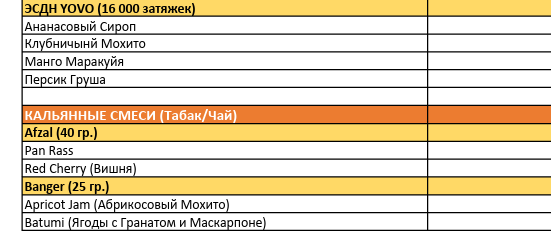

In [ ]:
# Добавляем фильтрацию по заголовку
title = "КАЛЬЯННЫЕ СМЕСИ (Табак/Чай)"
found_title = False
nodes = []
for doc in documents:
    current_nodes = Settings.node_parser.get_nodes_from_documents([doc])
    for node in current_nodes:
        if title in node.text:
            found_title = True
            node.text = node.text.split(title)[-1].strip()
        node.metadata["is_relevant"] = found_title
        nodes.append(node)

relevant_nodes = [node for node in nodes if node.metadata["is_relevant"]]

index = VectorStoreIndex(nodes=relevant_nodes)   # Создаем индекс эмбеддинга включающий только relevant_nodes


retriever = VectorIndexRetriever(     # Создаем механизм поиска по индексу
    index=index,                      # Указываем используемый индекс, который ранее создали
    similarity_top_k=3,               # Указываем количество наиболее релевантных результатов для возврата
)

response_synthesizer = get_response_synthesizer(    # Настраимваем синтезатор ответа
    response_mode="compact",                        # Режим компактного ответа
    llm=llm                                         # Указываем используемую языковую модель
    )

query_engine = RetrieverQueryEngine(                # Создаем механизм обработки запросов
    retriever=retriever,                            # Указываем ранее созданный механизм поиска
    response_synthesizer=response_synthesizer       # и синтезатор ответа
)

Отправляем вопрос модели

In [ ]:
user_question = "Составь пошаговый гайд по созданию первого микса для новичка"        # Формируем вопрос к модели
response = query_engine.query(generate_query(user_question))                          # Отправляем запрос через поисковую систему
print(response)                                                                       # Выводим полученный ответ

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.




1. Выбор базового вкуса: определи основной компонент, который будет задавать тон всей смеси. Например, это может быть фруктовый, десертный или цитрусовый вкус. Например, "Яблоко Бузина" от NAШ.
2. Добавление дополнительных оттенков: подбери 1-2 дополнительных вкуса для подчеркивания базы. Например, можно добавить "Груша Фисташка" или "Малина Личи Базилик".
3. Оценка интенсивности: доминирующие и фоновые вкусы должны быть сбалансированы. Например, основной вкус может составлять 60-70% от общей смеси, а дополнительные - 30-40%.
4. Учёт пропорций: например, базовый вкус - 60-70%, дополнительный - 30-40%, третий компонент - до 15%.
5. Рекомендации по смешиванию: используй табак одного бренда или схожей крепости.

Предупреждение о вреде курения: курение табака вредно для здоровья и может привести к серьезным заболеваниям.


Отлично! Ответ модели корректен, но видно, что стоит добавить больше данных в инструкцию, так как тема довольно специфична

Но на всякий случай проверим какие данные поступают в модель

In [ ]:
# Проверим наличие функции generate_query и используется ли она
query = generate_query(user_question) if "generate_query" in globals() else user_question

# Получаем релевантные чанки
retrieved_nodes = retriever.retrieve(query)

# Выводим найденные фрагменты
print("Топ-3 наиболее релевантных чанка")
for i, node in enumerate(retrieved_nodes, 1):
    print(f"Chunk #{i} (Score: {node.score:.3f}):\n{node.text}\n---")

=== Retrieved chunks (Топ-3 наиболее релевантных чанка) ===
Чанк #1 (Score: 0.493):
Сахарная Клюква 430
Скитлз 430
Смородна Чабрец 430
Чернослив Кедр 430
Чупа Чупс (Энергетик, Бабл Гам) 430
Юбилейное печенье 430
Юпи (Виноградная Газировка) 430
Ягодный 430
Rave (25 гр.)
Абрикос 240
Апельсиновая Газировка 240
Арбуз 240
Бельгийские Вафли 240
Манго 240
Розовый Лимонад 240
Sapphire Crown (25 гр.)
Alpine Strawberry (Земляника) 270
Bitter Cherry (Вишня с Косточкой) 270
Bright Side (Бузина с Жасмином) 270
Classy Aperol (Апероль) 270
Crispy Pear (Груша) 270
Dried Plum (Чернослив) 270
Ekzo (Фруктовое Мороженое) 270
Fragant Blackcurrant (Черная Смородина) 270
Froostyle (Лимонад с Кактусом) 270
Grapefruit (Грейпфрут) 270
Italian Tiramisu (Тирамису) 270
Kiwi Fruit (Киви) 270
Lavender Tonic (Тоник с Лавандой) 270
MaJuMi (Мажитель с Дыней и Ананасом) 270
Pineberry (Ягоды Мята и Хвоя) 270
Pumpkin Raf (Тыквенный Раф) 270
Redberry (Брусника) 270
Roibos Crème Caramel ( Чай Ройбуш Карамель и Цитрус) 270
S

"Лишних" данных нет, можно продолжать тесты)

In [ ]:
user_question = "Подскажи какие смеси табака подойдут новичку и почему ты так считаешь?"   # Формируем вопрос к модели
response = query_engine.query(generate_query(user_question))                               # Отправляем запрос через поисковую систему
print(response)                                                                            # Выводим полученный ответ

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



    Для новичков подойдут смеси с мягкими и средними вкусами, например, такие как:
    - **Brusko** (разные варианты, например, кокос, дыня, яблоко).
    - **Chabacco Medium** (например, с ароматами фруктов или ягод).
    - **NAШ** (например, арбуз, дыня, малина).
    
    Эти смеси помогут новичку адаптироваться к вкусам табака и не будут слишком насыщенными или резкими.

    Предупреждение о вреде курения: курение табака вредно для здоровья и может привести к серьезным заболеваниям.


In [ ]:
user_question = "Помоги подобрать мне смесь или микс из смесей с легкой цитрусовой ноткой и освежающим холодом мяты. Напиши пять вариантов"   # Формируем вопрос к модели
response = query_engine.query(generate_query(user_question))                                                                        # Отправляем запрос через поисковую систему
print(response)                                                                                                                     # Выводим полученный ответ

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



1.	Grapefruit (грейпфрут) от Element Воздух
2.	Lemonchello (Лимончелло) от NAШ
3.	Mint (Мята) от Element Воздух
4.	Bright Side (Бузина с Жасмином) от Rave с добавлением Mint (Мята) от Element Воздух
5.	Alpine Strawberry (Земляника) от Rave с добавлением Mint (Мята) от Element Воздух


In [ ]:
user_question = "Какие ароматы есть от NAШ?"                           # Формируем вопрос к модели
response = query_engine.query(generate_query(user_question))           # Отправляем запрос через поисковую систему
print(response)                                                        # Выводим полученный ответ

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



    НАШ (20 гр.) — Арбуз, Белая Клубника, Бренди, Груша Горгонзола, Дыня Йогурт, Земляника, Индиго (Черника Малина Бузина), Карамель Цитрус, Кокос, Кола Карамель, Лаванда Фейхоа, Ледяной Арбуз, Лимончелло, Липтон, Молочный Шейк.
    НАШ (40 гр.) — Арбуз Ягоды, Белая Клубника, Бренди, Груша Горгонзола, Дыня Йогурт, Земляника, Индиго (Черника Малина Бузина), Карамель Цитрус, Кокос, Кола Карамель, Лаванда Фейхоа, Ледяной Арбуз, Лимончелло, Липтон, Молочный Шейк.
    В ассортименте НАШ представлены разнообразные ароматы.


Проверим умет ли она говорить "нет"

In [ ]:
user_question = "Есть ли в наличии табак с ароматом доширака?"         # Формируем вопрос к модели
response = query_engine.query(generate_query(user_question))           # Отправляем запрос через поисковую систему
print(response)                                                        # Выводим полученный ответ

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



    В ассортименте нет табака с ароматом доширака.


То что она ничего не "придумала", это хорошо. Но она не предложила альтернативу и не предупредила о вреде курения.

ВЫВОД:

Несмотря на явный недостаток данных результат довольно хороший.

Так же модель не смотря на инструкцию порой забывает предупреждать о вреде курения

Ответы модели кажутся корректными, есть моменты, когда она "не понимает" какой производитель у какого аромата, так как информация в таблице довольно специффично внесена. Можно "пересобрать" таблицу для того, чтобы модель лучше "понимала" данные или использовать другую RAG-систему, или вообще сделать комбинацию RAG-системы и поиска по ключевым словам.